# Vamsi Chinta
# Machine Learning - Facial Recognition Project
# CNN

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/gdrive


In [ ]:
%reset

Once deleted, variables cannot be recovered. Proceed (y/[n])? y


In [ ]:
from __future__ import print_function
import keras
from keras import backend as K
from keras import layers, models, Sequential
from keras.layers import Dense, Conv2D, BatchNormalization, Activation, AveragePooling2D, Input, Flatten
from keras.layers import Conv2D as C2D
from keras.layers import MaxPooling2D as MP2D
from keras.layers import Dropout as DO

from keras.layers import LSTM#, sequential
from keras.optimizers import Adam
from keras.callbacks import ModelCheckpoint, LearningRateScheduler, ReduceLROnPlateau, History
from keras.preprocessing.image import ImageDataGenerator as ImgDataGen
from keras.preprocessing.image import img_to_array, load_img
from keras.regularizers import l2
from keras.models import Model
#-   -   -   -   -   -   -   -   -   -   -   -   -   -   -   -   -   -   -   -
from keras.utils import to_categorical
from keras.utils.vis_utils import plot_model
from keras.wrappers.scikit_learn import KerasRegressor
#-   -   -   -   -   -   -   -   -   -   -   -   -   -   -   -   -   -   -   -
from sklearn.model_selection import ShuffleSplit, train_test_split
#-   -   -   -   -   -   -   -   -   -   -   -   -   -   -   -   -   -   -   -
import glob
import cv2
#-   -   -   -   -   -   -   -   -   -   -   -   -   -   -   -   -   -   -   -
import pydot
#-   -   -   -   -   -   -   -   -   -   -   -   -   -   -   -   -   -   -   -
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
import h5py
#-   -   -   -   -   -   -   -   -   -   -   -   -   -   -   -   -   -   -   -
import warnings
warnings.filterwarnings("ignore")
#-   -   -   -   -   -   -   -   -   -   -   -   -   -   -   -   -   -   -   -
import os
from os import listdir
from os.path import isfile, join
import pandas as pd
import numpy as np
from PIL import Image
#from keras import metrics

Using TensorFlow backend.


In [ ]:
path 			= r'/content/gdrive/My Drive/Colab_Datasets'
os.chdir(path)

seed 			= 7
np.random.seed(seed)

save_dir = os.path.join(os.getcwd(), 'NueralNetworksSavedModels')
if not os.path.isdir(save_dir):
    os.makedirs(save_dir)
    
RevNo,i 			= 0,0 


# Programme Code

TrustworthyCnn_Rev 1
Found 561 images.
Found 140 images.
Found 37 images.
Epoch 1/10
15/15 [==============================] - 3s 174ms/step - loss: 10747.8418 - mean_absolute_error: 28.9775 - acc: 0.0688 - val_loss: 4.6458 - val_mean_absolute_error: 1.7449 - val_acc: 0.0938
Epoch 2/10
15/15 [==============================] - 7s 483ms/step - loss: 4.4285 - mean_absolute_error: 1.6905 - acc: 0.0919 - val_loss: 3.5738 - val_mean_absolute_error: 1.5083 - val_acc: 0.1481
Epoch 3/10
15/15 [==============================] - 2s 129ms/step - loss: 4.1003 - mean_absolute_error: 1.6416 - acc: 0.0936 - val_loss: 4.0743 - val_mean_absolute_error: 1.6583 - val_acc: 0.1111
Epoch 4/10
15/15 [==============================] - 2s 128ms/step - loss: 4.1987 - mean_absolute_error: 1.6506 - acc: 0.0977 - val_loss: 3.6246 - val_mean_absolute_error: 1.5889 - val_acc: 0.0741
Epoch 5/10
15/15 [==============================] - 7s 494ms/step - loss: 4.1150 - mean_absolute_error: 1.6266 - acc: 0.1036 - val_loss: 

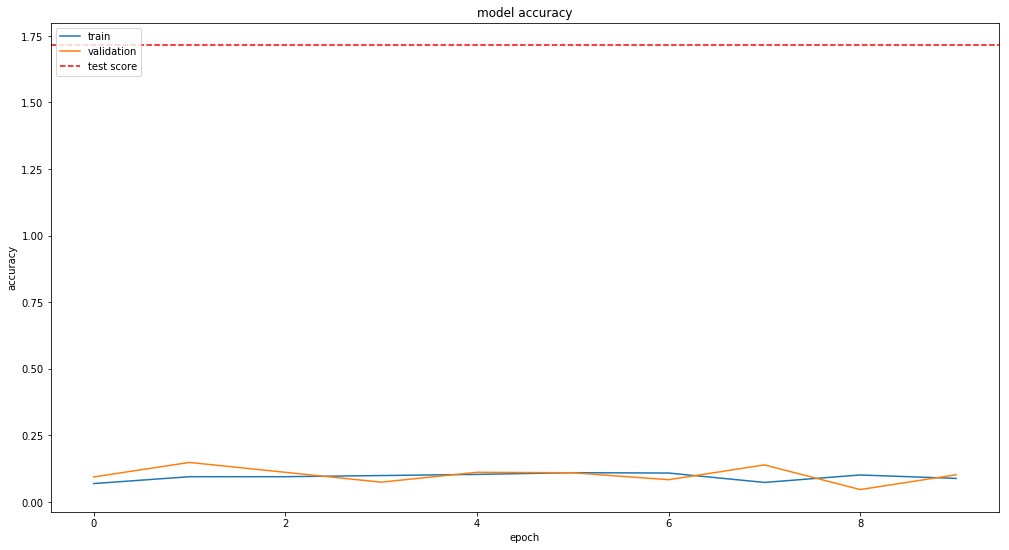

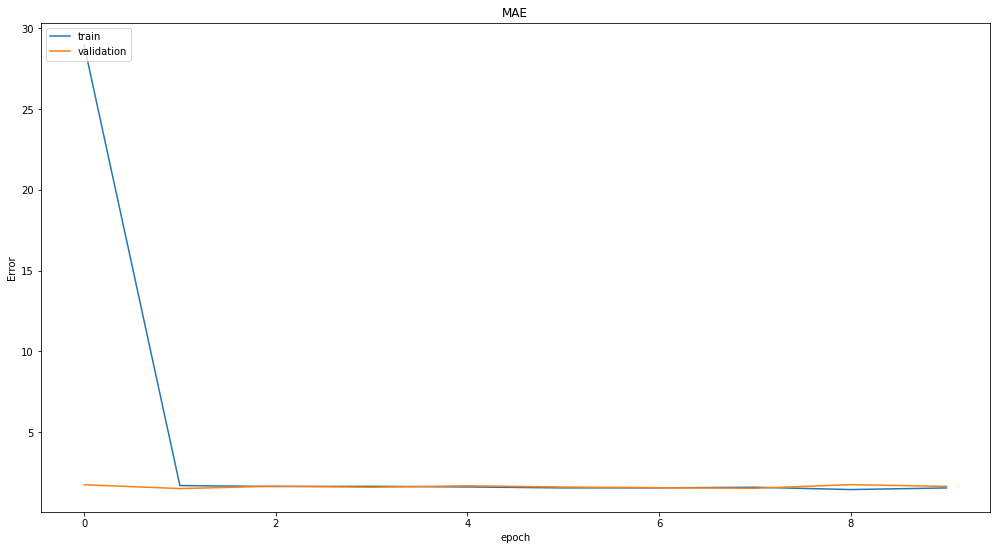

In [ ]:
df 			        = pd.read_csv('Train_baseball.csv')
df['Image_Name'] 	= df['Image_Name'] + '.jpg'
test_size 		    = 0.05
validationSplit 	= 0.2
df_trn, df_tst 		= train_test_split(df, test_size=test_size, random_state=seed)
df_subtrn, df_val 	= train_test_split(df_trn, test_size=validationSplit, random_state=seed)
'-------------------------------------------------------------------------------'
'Generator Parameters'
interpolationMethod 	= 'nearest'                                             #Interpolation method used to resample the image if the target size is different from that of the loaded image.Supported methods are `"nearest"`, `"bilinear"`, and `"bicubic"`
'----'
dataType 		        = 'float32'
shuffle 		        = True
class_mode 		        = 'other'
inputDirectory     	    = './TrainPictures'
color_mode 	 	        = "rgb"
has_ext 		        = False
'Visuals'
model_type 		        = 'TrustworthyCnn_Rev %d' % (RevNo)
model_name 		        = 'CNN_%s_model.{epoch:03d}.h5' % model_type
print(model_type)
monitor 		        = 'val_acc'
verbose 		        = 1
save_best_only 		    = True

filepath 		        = os.path.join(save_dir, model_name)

################################################################################
RevNo 			    = i + 1
outputDirectory    	= './AugmentedPics/Rev1'
'----'
test_size 		    = 0.05
validationSplit 	= 0.2

xColName            = 'Image_Name'
yColName     	   	= 'Trustworthy_Score'

img_height         	= 128
img_width          	= 85
img_channels 		= 3
reshapeSize        	= (img_width, img_height)
input_shape 		= (img_width, img_height, img_channels)                      # (batch_size, imageside1, imageside2, channels)

A1,A2,A3,A4     	= 'relu','relu','relu','relu'
K1,K2,K3,K4         = (2,2),        (4,4),(3,3),(4,4)
S1,S2,S3,S4         = (1,1),        (1,1),(1,1),(1,1)
F1,F2,F3,F4         = 32,            32,32,64
P1,P2,P3            = (2,2),        (2,2),(2,2)
DO1,DO2             = 0.5,0.5
U1,U2               = 128,1
DA1,DA2             = 'relu','linear'

rescale                             = (1./255.)
rotation_range                      = 5
featurewise_std_normalization 		= False 
samplewise_std_normalization        = True
'------------------------------'
#zca_epsilon
#zca_whitening
#width_shift_range
#height_shift_range
#brightness_range
#shear_range
#horizontal_flip
#vertical_flip

'Compiling Parameters'
epochs 			    = 10
batch_size 		    = 32
steps_per_epoch 	= 15                 
valStepsPerEpoch 	= 4
tstStepsPerEpoch 	= len(df_tst)
loss 			    = 'mean_squared_error'
metrics	            = ['mae', 'acc']                                             # metrics.mae, metrics.acc                                                     	 	 	
optimizer 		    = 'adagrad' 

def cnn1():
        cnn = Sequential()
        cnn.add(C2D(filters= F1, kernel_size= K1, activation= A1, input_shape=input_shape,strides= S1))
        cnn.add(MP2D(pool_size=P1))
        cnn.add(DO(DO1))
                
        #cnn.add(C2D(filters= F2, kernel_size= K2, activation= A2,strides= S2))
        #cnn.add(C2D(filters= F3, kernel_size= K3, activation= A3))
        #cnn.add(MP2D(pool_size=P2))
        #cnn.add(DO(DO2))
        
        #cnn.add(MP2D(pool_size=P3))

        #cnn.add(C2D(filters= F4, kernel_size= K4, activation= A4))
                
        cnn.add(Flatten())
                
        cnn.add(Dense(units = U1, activation= DA1))
        cnn.add(Dense(units = U2, activation= DA2))
                
        cnn.compile(loss= loss, optimizer= optimizer,metrics=metrics)
        return cnn

    
    
    
    
    
    
    
    
    
    
    
    
    
    
    
    
    
    
    
    
    
    
    
    
    
    
    
    
    
    
    
    
    
    
    
    
    
    
    
    
    

    
    
    
#lr_reducer = ReduceLROnPlateau(factor=np.sqrt(0.1),
#                               cooldown=0,
#                               patience=5,
#                               min_lr=0.5e-6)
#checkpoint = ModelCheckpoint(filepath=filepath,
#                             monitor = monitor,
#                             verbose = verbose,
#                             save_best_only = save_best_only)
#callbacks = [checkpoint, lr_reducer]    
    

'#%% configuring data-generators'
dg_subtrn 	= ImgDataGen(rescale= rescale,\
			             validation_split= validationSplit,\
			             dtype = dataType,\
			             featurewise_std_normalization = featurewise_std_normalization,\
                         rotation_range = rotation_range)
dg_tst  	= ImgDataGen(rescale= rescale,\
		                  dtype = dataType,\
		                  featurewise_std_normalization = featurewise_std_normalization,\
                          rotation_range = rotation_range)


'PreProcessing Training Dataset'
df_subtrn = dg_subtrn.flow_from_dataframe(dataframe = df_trn,\
				  directory = inputDirectory,\
				  x_col = xColName,\
				  y_col = yColName,\
				  batch_size = batch_size,\
				  seed = seed,\
				  shuffle = True,\
				  color_mode = color_mode,\
				  class_mode = class_mode,\
				  target_size = reshapeSize,\
				  has_ext = has_ext,\
				  subset = 'training',\
				  interpolation = interpolationMethod)#,\
                  #save_to_dir = outputDirectory)
'PreProcessing Validation Dataset'
df_val = dg_subtrn.flow_from_dataframe(dataframe = df_trn,\
					directory = inputDirectory,\
					x_col = xColName,\
					y_col= yColName,\
					batch_size = batch_size,\
					seed = seed,\
					shuffle = True,\
					color_mode = color_mode,\
					class_mode = class_mode,\
					target_size = reshapeSize,\
					has_ext = has_ext,\
					subset = 'validation',\
					interpolation = interpolationMethod)
'PreProcessing Test Dataset '
df_tst1 = dg_tst.flow_from_dataframe(dataframe = df_tst,\
					directory=inputDirectory,\
					x_col= xColName,\
					y_col= yColName,\
					batch_size=batch_size,\
					seed = seed,\
					shuffle=shuffle,\
					has_ext = has_ext,\
					class_mode=class_mode,\
					target_size=reshapeSize,\
					interpolation = interpolationMethod)

model = cnn1()

#lr_reducer = ReduceLROnPlateau(factor=np.sqrt(0.1),
#                               cooldown=0,
#                               patience=5,
#                               min_lr=0.5e-6)

#checkpoint = ModelCheckpoint(filepath=filepath,
#                             monitor = monitor,
#                             verbose = verbose,
#                             save_best_only = save_best_only) 

history = model.fit_generator(df_subtrn,\
                              steps_per_epoch = steps_per_epoch,\
                              epochs = epochs,\
                              validation_data = df_val,\
                              validation_steps = valStepsPerEpoch)#,\
                              #callbacks = callbacks)

acc_tst = model.evaluate_generator(generator= df_tst1,
				                    steps= tstStepsPerEpoch)
			





'#  "Accuracy" '
fig = plt.gcf()
fig.set_size_inches(17, 9)
fig.show()
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.axhline(y=acc_tst[1], color='r', linestyle='--')
# -- -- -- --
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation','test score'], loc='upper left')
plt.show()
# fig.savefig('test2png.png', dpi=100)

'#  "MAE" '
fig = plt.gcf()
fig.set_size_inches(17, 9)
fig.show()
plt.plot(history.history['mean_absolute_error'])
plt.plot(history.history['val_mean_absolute_error'])
#plt.axhline(y=mae_tst[1], color='r', linestyle='--')
# -- -- -- --
plt.title('MAE')
plt.ylabel('Error')
plt.xlabel('epoch')
plt.legend(['train', 'validation','test score'], loc='upper left')
plt.show()

# fig.savefig('test2png.png', dpi=100)

In [ ]:
save_dir = os.path.join(os.getcwd(), '/AugmentedPics/rev1')
if not os.path.isdir(save_dir):
    os.makedirs(save_dir)

# Visuals


In [ ]:
plot_model(model, to_file='./ResnetModel.png',\
	   show_shapes=True,\
	   show_layer_names=True,\
	   rankdir='LR')
# model.summary()